In [1]:
import json

with open("data/all_delisted_2024_data.json") as f:
    delisted_data = json.load(f)

with open("data/all_2024_data.json") as f:
    all_data = json.load(f)



In [2]:
import pandas as pd

delist_feature_list = pd.DataFrame({})
all_feature_list = pd.DataFrame({})

In [3]:
feature_key_list = [
    "price_ave",
    "price_med",
    "price_dev",
    "price_min",
    "price_max",
    "price_max_change",
    "price_min_change",
    "price_sum_abs_change_rate",
    "price_short_dev",
    "price_range",
    "price_max_down",
    "price_max_mean",
    "volume_ave",
    "volume_med",
    "volume_dev",
    "volume_min",
    "volume_max",
    "volume_max_change",
    "volume_min_change",
    "volume_sum_abs_change_rate",
    "volume_short_dev",
    "volume_range",
    "volume_max_down",
    "volume_max_mean"] 

In [4]:
import statistics

def split_list(l, n):
    """
    リストをサブリストに分割する
    :param l: リスト
    :param n: サブリストの要素数
    :return: 
    """
    for idx in range(0, len(l), n):
        yield l[idx:idx + n]
 

def cul_feature(data):
    ave = statistics.mean(data)
    med = statistics.median(data)
    dev = statistics.pstdev(data)
    min_data = min(data)
    max_data = max(data)
    max_change = -(10 ** 10)
    min_change = 10 ** 10
    sum_change = 0
    div_data = list(split_list(data, 4))
    short_dev = 0
    data_range = max(data)-min(data)
    data_down_rate = (max(data) - min(data)) / (min(data) + 0.0000000000000000001)
    max_mean = max_data - ave
    for i in range(len(div_data)):
        short_dev += statistics.pstdev(div_data[i])
    short_dev = short_dev / len(div_data)
    for i in range(1,len(data)):
        temp_change = (data[i] - data[i-1]) / (data[i-1] + + 0.0000000000000000001)
        if max_change < temp_change:
            max_change = temp_change
        if min_change > temp_change:
            min_change = temp_change
        sum_change = abs(temp_change)
    
    feature_data = [ave, med, dev, min_data, max_data, max_change, min_change, sum_change, short_dev, data_range, data_down_rate, max_mean]
    return feature_data
        

In [5]:
delisted_data["aragon"]["price"]

[5.7813843790514925,
 5.957597110042721,
 6.000833776894283,
 5.609452795917373,
 5.7620325919591275,
 5.743851873747768,
 5.673458931547237,
 5.6190330229253,
 5.916880179163412,
 5.953938004017024,
 6.517525286024951,
 6.622815361445531,
 6.404350452362254,
 6.544491186287789,
 6.305117999196127,
 6.382662240613104,
 6.586904571086315,
 6.421775294689989,
 6.247104773682766,
 6.324932393670013,
 6.237434188207247,
 6.206870457340432,
 5.85563050167404,
 5.698362773747876,
 5.675339450600645,
 5.636984511304449,
 5.754080852931373,
 5.754297998219715,
 5.720410563678054,
 5.86281696523646,
 5.936048218098292,
 5.788114278789959,
 5.841889204654864,
 5.854458483505102,
 5.820304233726242,
 5.802391061494091,
 5.825694458561153,
 6.022886311379525,
 6.14190164127837,
 6.1398861357544146,
 6.311981919054643,
 6.331503300680928,
 6.360205239463169,
 6.738379128971715,
 6.713460054200944,
 7.043989907979639,
 7.1591303969807285,
 7.114789781513981,
 7.069875084667667,
 7.281482933241003,
 

In [6]:
for i, (key, value) in enumerate(delisted_data.items()):
    try:
        if value["price"] != []:
            price_feature = cul_feature(value["price"])
            volume_feature = cul_feature(value["volume"])
            add_data = price_feature + volume_feature
            add_dataframe = pd.Series(add_data, index=feature_key_list)
            delist_feature_list[key] = add_dataframe
    except:
        print("no")

for i, (key, value) in enumerate(all_data.items()):
    if value["price"] != []:
        price_feature = cul_feature(value["price"])
        volume_feature = cul_feature(value["volume"])
        add_data = price_feature + volume_feature
        add_dataframe = pd.Series(add_data, index=feature_key_list)
        all_feature_list[key] = add_dataframe

no


/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_48984/1320878657.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_feature_list[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_48984/1320878657.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  all_feature_list[key] = add_dataframe
/var/folders/56/psj7ncmx4wg4kv9hzqkrrnmc0000gn/T/ipykernel_48984/1320878657.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,

In [7]:
len(delist_feature_list)

24

In [8]:
import numpy as np

def remove_outliers_index(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 30 * iqr
    upper_bound = q3 + 30 * iqr
    index_list = set()
    for i, value in enumerate(data):
        if value > upper_bound:
            index_list.add(i)    
    return index_list

In [9]:
format_all_feature = all_feature_list.T
format_delist_feature = delist_feature_list.T
join_feature = pd.concat([format_delist_feature, format_all_feature])

key_data = list(join_feature.index.values)
len(key_data)

407

In [11]:
join_feature

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,7.547988,7.351843,1.535045,5.609453,11.404511,0.280764,-0.159903,0.029065,0.211714,5.795058,...,6.356671e+06,5.706554e+06,5.654649e+07,2.852475,-0.667223,0.143833,3.057075e+06,5.083994e+07,8.909044,4.495312e+07
barnbridge,3.829980,3.716744,0.516472,3.074567,5.038696,0.084539,-0.177360,0.014276,0.105492,1.964129,...,2.006108e+07,2.176864e+06,1.716078e+08,4.037226,-0.821878,0.273127,8.228795e+06,1.694309e+08,77.832584,1.544591e+08
concentrated-voting-power,0.474584,0.460749,0.091227,0.338223,0.651410,0.125617,-0.127247,0.002204,0.013207,0.313187,...,1.829730e+06,1.683254e+06,1.211476e+07,3.783588,-0.727241,0.024945,1.053893e+06,1.043151e+07,6.197228,8.100202e+06
drep-new,0.240066,0.254813,0.099396,0.031183,0.531297,0.623588,-0.527202,0.044629,0.010776,0.500114,...,1.582769e+07,8.886584e+04,1.253341e+08,17.420762,-0.868411,0.458561,4.244749e+06,1.252452e+08,1409.373728,1.191241e+08
ethos,0.118176,0.115883,0.012557,0.094217,0.154625,0.137470,-0.096570,0.001165,0.002952,0.060408,...,6.618299e+06,2.360744e+06,4.426890e+07,3.445695,-0.659491,0.561818,3.209243e+06,4.190816e+07,17.752099,3.579761e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yfii-finance,1067.714566,868.502335,589.261214,522.767492,2732.560921,0.433294,-0.598883,0.036893,48.492747,2209.793429,...,1.675775e+07,3.579444e+06,8.142117e+07,11.384672,-0.894547,0.036620,5.567568e+06,7.784173e+07,21.746876,5.675504e+07
yield-guild-games,0.697435,0.534781,0.314251,0.416302,1.683650,0.363876,-0.165650,0.005120,0.051041,1.267348,...,1.035537e+08,1.639967e+07,5.130450e+08,7.372407,-0.639312,0.223480,3.707996e+07,4.966453e+08,30.283852,4.131269e+08
zcash,26.232522,26.229314,4.228073,19.272325,35.007436,0.134235,-0.097547,0.022954,0.795341,15.735110,...,3.143406e+07,1.552713e+07,1.436416e+08,2.069012,-0.648145,0.297840,1.247177e+07,1.281145e+08,8.251008,8.351022e+07
zenith-2,0.178754,0.172725,0.060465,0.082217,0.328492,0.857080,-0.264512,0.277398,0.017438,0.246276,...,2.784102e+05,5.955665e+04,1.125976e+06,4.259864,-0.673353,1.346729,1.137463e+05,1.066419e+06,17.905966,8.828045e+05


In [12]:
out_index = set()

for i, (key, value) in enumerate(join_feature.items()):
    bad = remove_outliers_index(value)
    out_index = out_index | bad

len(out_index)

66

In [13]:
def format_symbol_list(data, out):
    now_num = 0
    for i in range(len(out)):
        data.pop(out[i]-now_num)
        now_num +=1
    return data

In [14]:
del_key_data = format_symbol_list(key_data, list(out_index))
len(del_key_data)

341

In [19]:
format_join_feature = pd.DataFrame()

for i, (key, value) in enumerate(join_feature.items()):
    temp_list = []
    temp_key = []
    for j, (keys, values) in enumerate(value.items()):
        if j not in out_index:
            temp_list.append(values)
            temp_key.append(keys)
    temp_series = pd.Series(temp_list, index=temp_key)
    format_join_feature[key] = temp_series




In [20]:
format_join_feature

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,7.547988,7.351843,1.535045,5.609453,11.404511,0.280764,-0.159903,0.029065,0.211714,5.795058,...,6.356671e+06,5.706554e+06,5.654649e+07,2.852475,-0.667223,0.143833,3.057075e+06,5.083994e+07,8.909044,4.495312e+07
barnbridge,3.829980,3.716744,0.516472,3.074567,5.038696,0.084539,-0.177360,0.014276,0.105492,1.964129,...,2.006108e+07,2.176864e+06,1.716078e+08,4.037226,-0.821878,0.273127,8.228795e+06,1.694309e+08,77.832584,1.544591e+08
concentrated-voting-power,0.474584,0.460749,0.091227,0.338223,0.651410,0.125617,-0.127247,0.002204,0.013207,0.313187,...,1.829730e+06,1.683254e+06,1.211476e+07,3.783588,-0.727241,0.024945,1.053893e+06,1.043151e+07,6.197228,8.100202e+06
drep-new,0.240066,0.254813,0.099396,0.031183,0.531297,0.623588,-0.527202,0.044629,0.010776,0.500114,...,1.582769e+07,8.886584e+04,1.253341e+08,17.420762,-0.868411,0.458561,4.244749e+06,1.252452e+08,1409.373728,1.191241e+08
ethos,0.118176,0.115883,0.012557,0.094217,0.154625,0.137470,-0.096570,0.001165,0.002952,0.060408,...,6.618299e+06,2.360744e+06,4.426890e+07,3.445695,-0.659491,0.561818,3.209243e+06,4.190816e+07,17.752099,3.579761e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrapped-nxm,61.473524,61.073179,11.251188,46.935220,83.112584,0.095658,-0.090848,0.048101,1.469012,36.177364,...,6.163415e+05,8.972840e+05,4.064842e+06,0.997716,-0.499294,0.008964,3.108933e+05,3.167558e+06,3.530163,2.158139e+06
yield-guild-games,0.697435,0.534781,0.314251,0.416302,1.683650,0.363876,-0.165650,0.005120,0.051041,1.267348,...,1.035537e+08,1.639967e+07,5.130450e+08,7.372407,-0.639312,0.223480,3.707996e+07,4.966453e+08,30.283852,4.131269e+08
zcash,26.232522,26.229314,4.228073,19.272325,35.007436,0.134235,-0.097547,0.022954,0.795341,15.735110,...,3.143406e+07,1.552713e+07,1.436416e+08,2.069012,-0.648145,0.297840,1.247177e+07,1.281145e+08,8.251008,8.351022e+07
zenith-2,0.178754,0.172725,0.060465,0.082217,0.328492,0.857080,-0.264512,0.277398,0.017438,0.246276,...,2.784102e+05,5.955665e+04,1.125976e+06,4.259864,-0.673353,1.346729,1.137463e+05,1.066419e+06,17.905966,8.828045e+05


In [21]:
stn_join_feature = format_join_feature.iloc[:, :].apply(lambda x: (x-x.mean())/x.std(), axis=0)
stn_join_feature

,price_ave,price_med,price_dev,price_min,price_max,price_max_change,price_min_change,price_sum_abs_change_rate,price_short_dev,price_range,...,volume_dev,volume_min,volume_max,volume_max_change,volume_min_change,volume_sum_abs_change_rate,volume_short_dev,volume_range,volume_max_down,volume_max_mean
aragon,0.569558,0.574366,0.606883,0.567808,0.614204,-0.180730,0.047823,-0.288725,0.399036,0.623601,...,-0.478246,-0.176846,-0.491099,-0.391617,0.384161,-0.486842,-0.383019,-0.502225,-0.390628,-0.508384
barnbridge,0.109395,0.112423,-0.044058,0.153940,0.060049,-0.546736,-0.097463,-0.604813,0.003059,-0.044105,...,-0.283924,-0.331127,-0.197804,-0.353020,-0.720150,-0.343716,-0.219678,-0.186453,-0.171330,-0.160162
concentrated-voting-power,-0.305890,-0.301344,-0.315820,-0.292819,-0.321871,-0.470115,0.319608,-0.862829,-0.340963,-0.331854,...,-0.542436,-0.352702,-0.604357,-0.361283,-0.044396,-0.618448,-0.446287,-0.609820,-0.399256,-0.625574
drep-new,-0.334915,-0.327514,-0.310600,-0.342949,-0.332327,0.458717,-3.009082,0.043919,-0.350023,-0.299273,...,-0.343952,-0.422392,-0.315758,0.082984,-1.052412,-0.138443,-0.345508,-0.304106,4.065317,-0.272525
ethos,-0.350001,-0.345169,-0.366096,-0.332658,-0.365117,-0.448008,0.574921,-0.885043,-0.379191,-0.375911,...,-0.474536,-0.323089,-0.522395,-0.372291,0.439367,-0.024139,-0.378213,-0.526007,-0.362492,-0.537498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wrapped-nxm,7.243713,7.401195,6.816195,7.315009,6.856505,-0.525996,0.622548,0.118126,5.086008,5.919040,...,-0.559641,-0.387056,-0.624877,-0.452040,1.583250,-0.636139,-0.469753,-0.629162,-0.407742,-0.644469
yield-guild-games,-0.278308,-0.291936,-0.173292,-0.280071,-0.232013,-0.025708,-0.000008,-0.800502,-0.199925,-0.165549,...,0.899960,0.290544,0.672530,-0.244368,0.583457,-0.398673,0.691542,0.684820,-0.322619,0.662384
zcash,2.882070,2.973287,2.327921,2.798526,2.668876,-0.454041,0.566792,-0.419331,2.574687,2.356088,...,-0.122661,0.252405,-0.269091,-0.417140,0.520383,-0.316359,-0.085670,-0.296466,-0.392722,-0.385775
zenith-2,-0.342504,-0.337946,-0.335479,-0.334617,-0.349981,0.894234,-0.822804,5.018873,-0.325191,-0.343516,...,-0.564433,-0.423673,-0.632368,-0.345767,0.340386,0.844742,-0.475980,-0.634757,-0.362002,-0.648525


In [22]:
main_ind_v = [[0.3369708882638471,
  0.33480856071443754,
  0.33912249102870734,
  0.32520899825785005,
  0.3430794085573052,
  -0.03866107151218766,
  0.047635468520500844,
  0.045644241213495244,
  0.33939836697710873,
  0.33435929848762114,
  0.016543012538205046,
  0.32055201401128525,
  0.11498518694003595,
  0.1149811921225748,
  0.10209954407517997,
  0.10848154973624698,
  0.09919488081371561,
  -0.03692073197357963,
  0.09013786718980285,
  0.03855359938601044,
  0.10431493201715689,
  0.09833355304453055,
  -0.034844393009803944,
  0.09385896553824755],
 [-0.10957165607837067,
  -0.10904918161636873,
  -0.10808420387729893,
  -0.10451545899916585,
  -0.10999567826331619,
  -0.01937019471769873,
  0.05606996680137382,
  -0.0332180718177019,
  -0.11064211501051613,
  -0.1070892033886722,
  -0.018604522142257458,
  -0.10108917228803214,
  0.34834468591151263,
  0.3221229849884666,
  0.3504413684843421,
  0.27569370038963453,
  0.34446342730625135,
  -0.04779014041475656,
  0.06075633692605274,
  -0.03273875125181298,
  0.3489104466784593,
  0.34322905437663725,
  -0.046046631651951095,
  0.3334811859002857],
 [-0.010507891488087024,
  -0.012908209330106567,
  0.016141728813236916,
  -0.0133804007927955,
  0.023082867156602162,
  0.44552914867011817,
  -0.30949546255441873,
  0.18948482150750026,
  0.009066032833643288,
  0.03815509975238579,
  0.31674600050307494,
  0.05797931270955969,
  -0.0018157036952028945,
  -0.04687584246567493,
  0.07548006739969679,
  -0.10025388763413638,
  0.10909335162223753,
  0.44276383733127517,
  -0.2685192834812828,
  0.23442700367956265,
  0.04112862785855404,
  0.11196413504356585,
  0.42569896379471706,
  0.12222558542896975]]

In [23]:
import numpy as np

feature_dataframe = pd.DataFrame({"P1": [], "P2": [], "P3": []})
temp = []

for i, value in enumerate(stn_join_feature.values):
    p1 = np.dot(np.array(value), np.array(main_ind_v[0]).reshape(-1, 1))
    p2 = np.dot(np.array(value), np.array(main_ind_v[1]).reshape(-1, 1))
    p3 = np.dot(np.array(value), np.array(main_ind_v[2]).reshape(-1, 1))

    key = stn_join_feature.index.values
    temp_value = pd.DataFrame({"P1": p1, "P2": p2, "P3": p3}, index=[key[i]])
    feature_dataframe = pd.concat([feature_dataframe, temp_value])
    temp.append([p1[0], p2[0], p3[0]])

feature = np.array(temp)

In [24]:
len(feature)

341

In [25]:
feature

array([[ 1.24491362, -1.48678669, -0.94863535],
       [-0.18864094, -0.65652657, -0.67126072],
       [-1.28178551, -0.96820117, -1.32027316],
       ...,
       [ 6.94346939, -2.22162583, -1.11500305],
       [-1.10297473, -1.3730891 ,  1.29287059],
       [-0.94369156,  0.14844732, -0.92487459]])

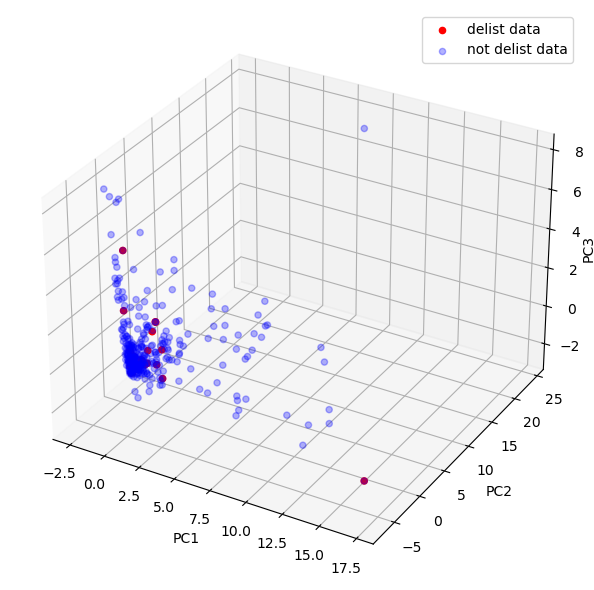

In [26]:
# 図やグラフを図示するためのライブラリをインポートする。
import matplotlib.pyplot as plt

color_group1 = [0 for i in range(21)]
color_group2 = [10 for i in range(320)]


# 第一主成分と第二主成分でプロットする
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

ax.scatter(feature[:21, 0], feature[:21, 1], feature[:21, 2], alpha=1, color="r", label="delist data")
ax.scatter(feature[21:, 0], feature[21:, 1], feature[21:, 2], alpha=0.3, color="b", label="not delist data")

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)

# 凡例の表示
ax.legend()

plt.tight_layout()
plt.show()



[[ 1.24491362 -1.48678669 -0.94863535]
 [-0.18864094 -0.65652657 -0.67126072]
 [-1.28178551 -0.96820117 -1.32027316]
 ...
 [ 6.94346939 -2.22162583 -1.11500305]
 [-1.10297473 -1.3730891   1.29287059]
 [-0.94369156  0.14844732 -0.92487459]]


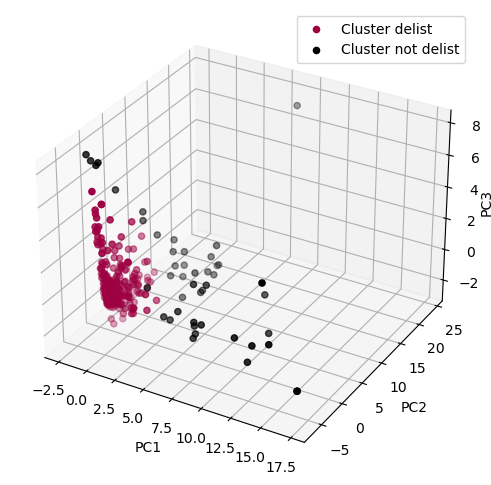

In [27]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

target = feature[:, [0,1,2]]

print(target)
dbscan = DBSCAN(eps=2.0, min_samples=10)
labels = dbscan.fit_predict(target)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': '3d'})

# クラスタごとにプロット
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

for label, color in zip(unique_labels, colors):
    if label == -1:  # 外れ値
        color = 'k'  # 黒色
    mask = (labels == label)
    if label == -1:
        label = "not delist"
    else:
        label = "delist"
    ax.scatter(target[mask, 0], target[mask, 1], target[mask, 2], c=[color], label=f'Cluster {label}')

# グラフの設定
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3", labelpad=-3, rotation=90)
ax.legend()
plt.show()

In [28]:
len(list(labels))

341

In [29]:
ans = []

num_wrong = 0
num_good = 0

for i, value in enumerate(labels):
    if value == -1 and i <= 21:
        num_wrong += 1
    elif value == -1 and i > 21:
        num_good += 1
        
    

In [30]:
print(num_good)
print(num_wrong)

45
1


In [31]:
precision = num_good / (num_good+num_wrong)
precision

0.9782608695652174

In [133]:
num_wrong

1

In [32]:

good_key = []

for i in range(len(del_key_data)):
    if list(labels)[i] == -1:
        good_key.append(del_key_data[i])

In [33]:
good_key

['wrapped-nxm',
 'aevo-exchange',
 'alchemy-pay',
 'aragon',
 'auction',
 'concierge-io',
 'bitcoin-cash',
 'doge-on-pulsechain',
 'zcoin',
 'near',
 'blur',
 'cow-protocol',
 'dent',
 'dforce-token',
 'dusk-network',
 'ethdown',
 'ethos-reserve-note',
 'lendle',
 'ethos',
 'fetch-ai',
 'fio-protocol',
 'flamingo-finance',
 'gifto',
 'xai-corp',
 'iota',
 'iris-token-2',
 'just',
 'kava-lend',
 'league-of-kingdoms',
 'uniswap-wormhole',
 'mainframe',
 'mina-protocol',
 'moonriver',
 'numeraire',
 'power-ledger',
 'rei-network',
 'render-token',
 'rocket-pool',
 'ssv-network',
 'starknet',
 'sui',
 'wrapped-ust',
 'thorchain',
 'worldcoin-wld',
 'wrapped-nxm',
 'zcash']

In [34]:
good_key_2023 = ['wrapped-nxm',
 'alchemy-pay',
 'aragon',
 'auto',
 'bancor',
 'eos',
 'zcoin',
 'ontology',
 'bitshares',
 'btc-standard-hashrate-token',
 'celer-network',
 'compound-governance-token',
 'contentos',
 'cream-2',
 'dego-finance',
 'elrond-erd-2',
 'ethereum-classic',
 'fantom',
 'ftx-token',
 'gala',
 'gmx',
 'immutable-x',
 'injective-protocol',
 'internet-computer',
 'klay-token',
 'kusama',
 'metal',
 'metis-token',
 'moviebloc',
 'numeraire',
 'og-fan-token',
 'perpetual-protocol',
 'rocket-pool',
 'ssv-network',
 'swipe',
 'thorchain',
 'wrapped-nxm',
 'zcash']


In [35]:
gene_good_index = ['alchemy-pay',
 'anyswap',
 'aptos',
 'audius-wormhole',
 'axie-infinity',
 'barnbridge',
 'matic-network',
 'near',
 'cartesi',
 'dego-finance',
 'dforce-token',
 'ethos',
 'ethup',
 'ftx-token',
 'gifto',
 'helium',
 'internet-computer',
 'keep-network',
 'kusama',
 'liquity',
 'lisk',
 'loopring',
 'metal',
 'mobox',
 'moviebloc',
 'rocket-pool',
 'ssv-network',
 'stellar',
 'thorchain',
 'unifi-protocol-dao',
 'venus',
 'wazirx',
 'wrapped-nxm',
 'zcash']

In [36]:
cross_2023 = set(good_key) & set(good_key_2023)

In [38]:
cross_gene_2023 = set(gene_good_index) & set(good_key_2023)

In [139]:
cross_index = set(gene_good_index) & set(good_key)

In [40]:
all_cross_key = set(gene_good_index) & set(good_key_2023)& set(good_key)

In [41]:
all_cross_key

{'alchemy-pay',
 'rocket-pool',
 'ssv-network',
 'thorchain',
 'wrapped-nxm',
 'zcash'}

In [47]:
len(cross_gene_2023)

12

In [46]:
len(cross_2023)

9

In [143]:
cross_index

{'alchemy-pay',
 'dforce-token',
 'ethos',
 'gifto',
 'near',
 'rocket-pool',
 'ssv-network',
 'thorchain',
 'wrapped-nxm',
 'zcash'}

In [144]:
precision_good = len(cross_index) / len(gene_good_index)

In [145]:
precision_good

0.29411764705882354

In [44]:
all_precision = len(all_cross_key) / len(cross_2023)

In [45]:
all_precision

0.6666666666666666